# Site Overview
Produces reslts for supplemental material figures S1 and S2.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_par = pd.read_csv('../data/session_params.csv').drop(columns=['Unnamed: 0'])
df_par['Date'] = pd.to_datetime(df_par['Session'].str[:8], format='%Y%m%d')
df_par['SubNum'], _ = pd.factorize(df_par['Subject'])

In [3]:
print(f"Total number of scan sessions: {len(df_par)}")

Total number of scan sessions: 244


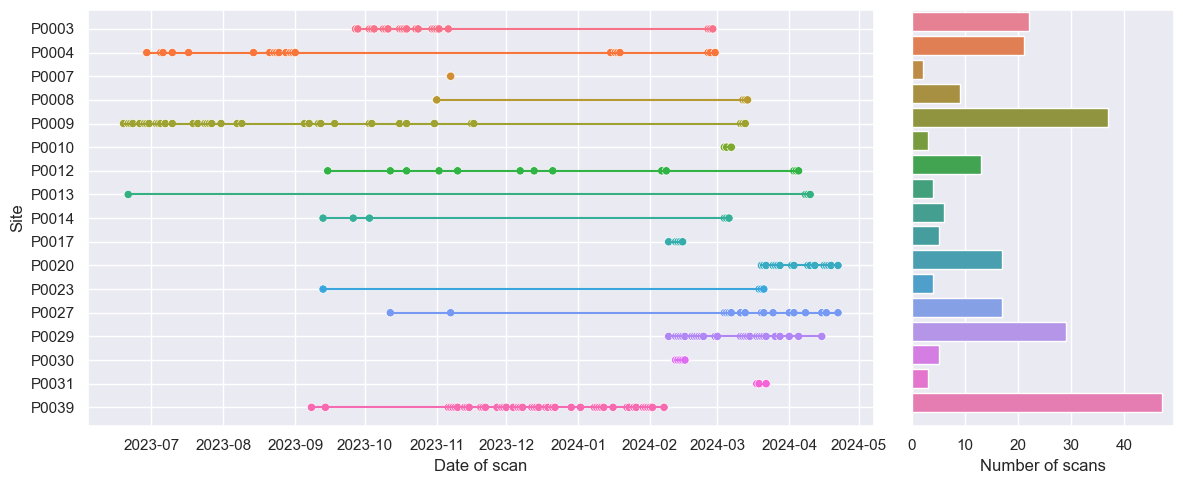

In [7]:
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [3, 1]})
sns.lineplot(data=df_par, x='Date', y='SubNum', hue='Subject', legend=None, ax=ax1)
sns.scatterplot(data=df_par, x='Date', y='SubNum', hue='Subject', legend=None, ax=ax1)
ax1.set_ylabel('Site')
ax1.set_yticks(list(range(17)), labels=df_par.Subject.unique())
ax1.set_xlabel('Date of scan')
ax1.invert_yaxis()

sns.countplot(data=df_par, y='Subject', ax=ax2, hue='Subject')
ax2.set_ylabel('')
ax2.set_yticks('')
ax2.set_xlabel('Number of scans')

plt.tight_layout()
plt.savefig('../results/figureS1_scans_overview.png', dpi=300)
plt.show()

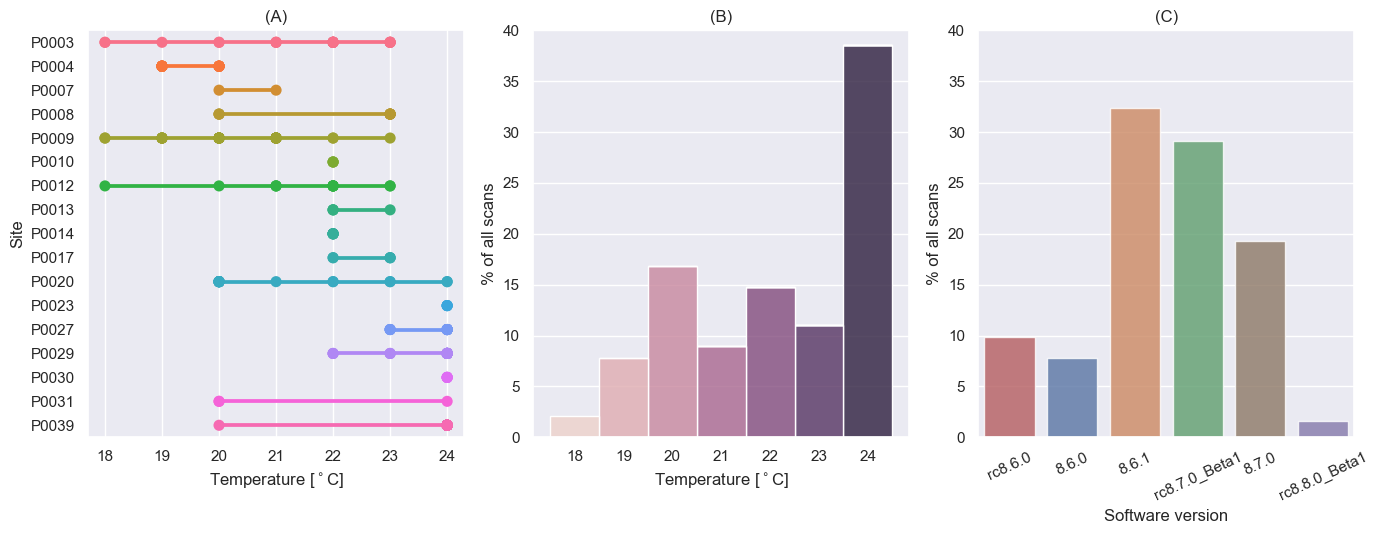

In [5]:
sns.set_theme()
fig, axes = plt.subplots(1,3,figsize=(14,5.5))

ax = axes[0]
sns.stripplot(data=df_par, y='Subject', x='Temperature', s=8, hue='Subject', alpha=1, orient='h', dodge=False, ax=ax, jitter=0)
sns.pointplot(data=df_par, y='Subject', x='Temperature', hue='Subject', markersize=0, 
                markers='d', errorbar=lambda x: (x.min(), x.max()),  orient='h', ax=ax)

ax.set_xlabel(r'Temperature [$^\circ$C]')
ax.set_title('(A)')
ax.set_ylabel('Site')

ax = axes[1]
sns.histplot(df_par, x='Temperature', hue='Temperature', multiple='stack', discrete=True, stat='percent', legend=False, ax=ax, alpha=.8)

ax.set_ylabel('% of all scans')
ax.set_xlabel(r'Temperature [$^\circ$C]')
ax.set_ylim([0,40])
ax.grid(False, axis='x')
ax.set_title('(B)')

ax = axes[2]
sns.countplot(df_par, x='SW', hue='SW', legend=False, ax=ax, orient='y', alpha=0.8, stat='percent', 
              order=['rc8.6.0', '8.6.0', '8.6.1', 'rc8.7.0_Beta1', '8.7.0', 'rc8.8.0_Beta1'])

ax.set_xlabel(r'Software version')
ax.set_ylabel('% of all scans')
ax.set_ylim([0,40])
ax.grid(False, axis='x')
ax.tick_params(axis='x', rotation=25)
ax.set_title('(C)')

plt.tight_layout()
plt.savefig('../results/figureS2_temperatures.png', dpi=300)
plt.show()